In [ ]:
#!unzip /content/Test.zip

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from torch.utils.data import Subset
from torch.utils.data import DataLoader

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transform

In [ ]:
data = ImageFolder('/content/Train/',transform=transform.ToTensor())

In [ ]:
test = ImageFolder('/content/Test/',transform=transform.ToTensor())

In [ ]:
t1_train = Subset(data,list(range(0,28)))
t2_train = Subset(data,list(range(28,56)))

In [ ]:
t1_train_dl = DataLoader(t1_train,1)
t2_train_dl = DataLoader(t2_train,1)

# T1-Weighted Images

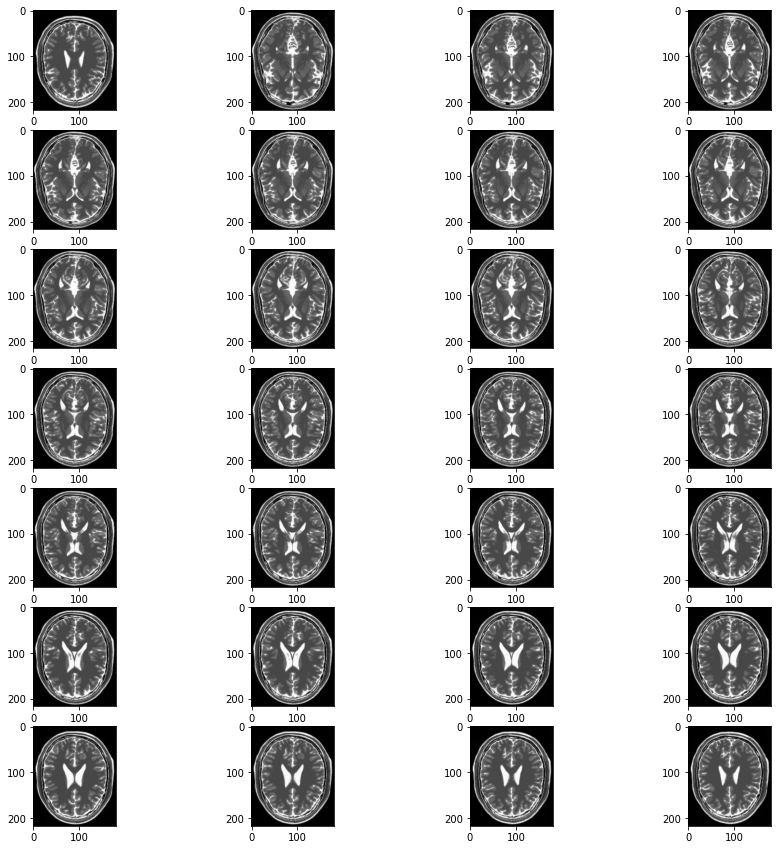

In [ ]:
ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t1_train_dl:
  fig[r-1][c-1].imshow(img[0].permute(1,2,0),cmap='gray')
  if c%4==0:
    r = r+1
  c = (c+1)%4

# T2-Weighted Images

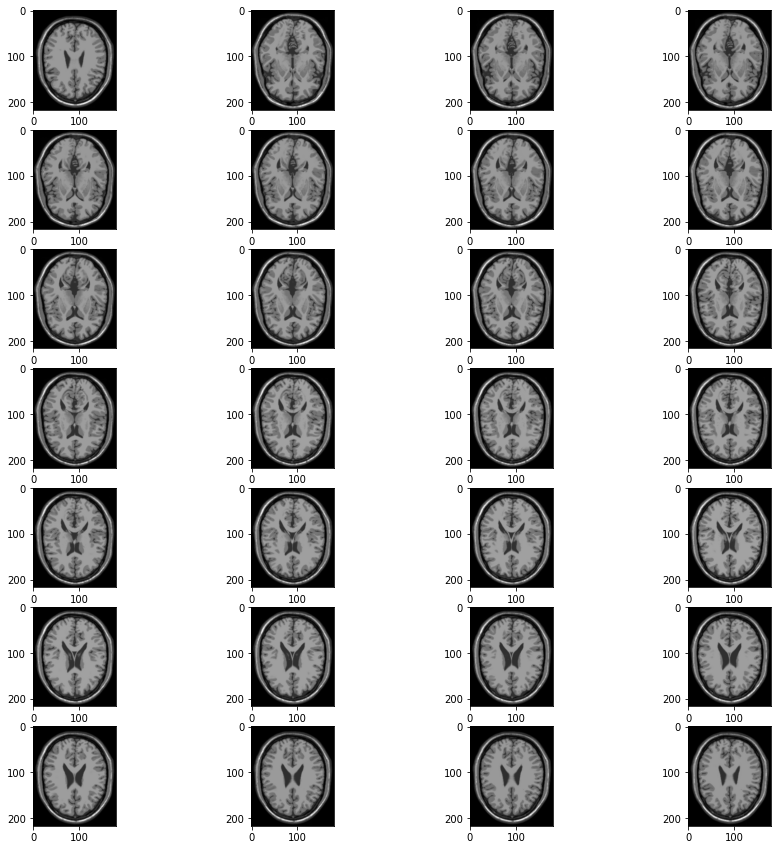

In [ ]:
ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t2_train_dl:
  fig[r-1][c-1].imshow(img[0].permute(1,2,0),cmap='gray')
  if c%4==0:
    r = r+1
  c = (c+1)%4

# Preprocessing

In [ ]:
!pip install antspyx

     |████████████████████████████████| 300.4 MB 11 kB/s 
     |████████████████████████████████| 64 kB 3.6 MB/s 


In [ ]:
import ants

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Biase-Field-Correction

In [ ]:
def correct(images):
  imgtensor = []
  for i in range(len(images)):
    img = ants.from_numpy(images[i][0].numpy())
    corrected = ants.n3_bias_field_correction(img)
    imgtensor.append(corrected.numpy())
  return th.tensor(imgtensor)

In [ ]:
t1_train_bfc = correct(t1_train)

In [ ]:
t2_train_bfc = correct(t2_train)

In [ ]:
t1_train_pre = th.utils.data.Subset(t1_train_bfc,list(range(0,len(t1_train_bfc))))
t2_train_pre = th.utils.data.Subset(t2_train_bfc,list(range(0,len(t2_train_bfc))))

In [ ]:
t1_train_pre_dl = DataLoader(t1_train_pre,1)

# Comparing Correted Images

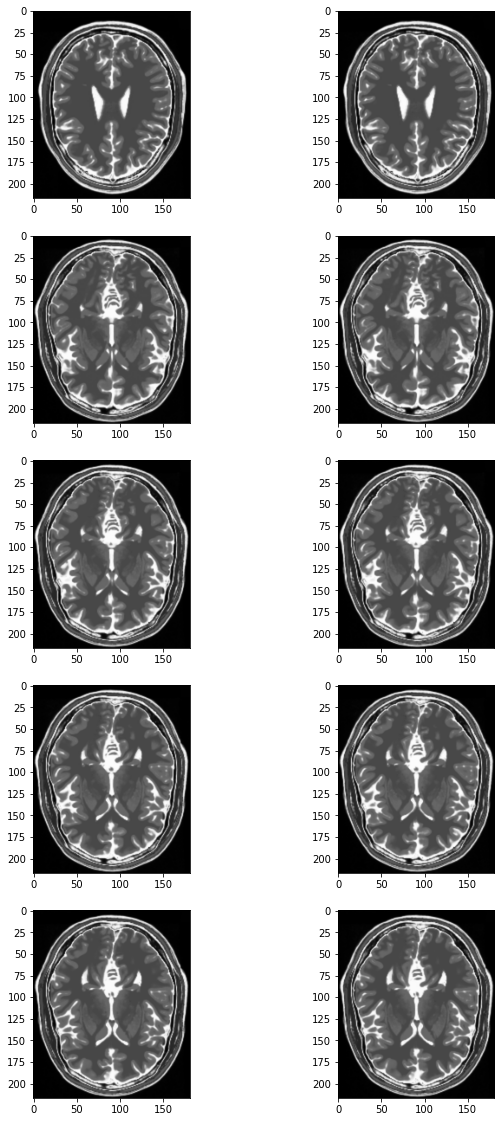

In [ ]:
fig,ax = plt.subplots(5,2,figsize=(10,20))
for i in range(len(t1_train)):
  im1 = t1_train[i][0]
  im2 = t1_train_pre[i]
  ax[i][0].imshow(im1.permute(1,2,0),cmap='gray')
  ax[i][1].imshow(im2.permute(1,2,0),cmap='gray')
  if i>=4:
    break

In [ ]:
image = ants.image_read(ants.get_ants_data('r16'))
mask = ants.get_mask(image)
fuzzy = ants.fuzzy_spatial_cmeans_segmentation(image, mask, number_of_clusters=3)

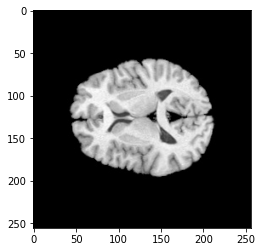

In [ ]:
plt.imshow(image.numpy(),cmap='gray')

In [ ]:
fuzzy

{'probability_images': [ANTsImage
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (256, 256)
  	 Spacing    : (1.0, 1.0)
  	 Origin     : (0.0, 0.0)
  	 Direction  : [1. 0. 0. 1.], ANTsImage
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (256, 256)
  	 Spacing    : (1.0, 1.0)
  	 Origin     : (0.0, 0.0)
  	 Direction  : [1. 0. 0. 1.], ANTsImage
  	 Pixel Type : float (float32)
  	 Components : 1
  	 Dimensions : (256, 256)
  	 Spacing    : (1.0, 1.0)
  	 Origin     : (0.0, 0.0)
  	 Direction  : [1. 0. 0. 1.]], 'segmentation_image': ANTsImage
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (256, 256)
 	 Spacing    : (1.0, 1.0)
 	 Origin     : (0.0, 0.0)
 	 Direction  : [1. 0. 0. 1.]}

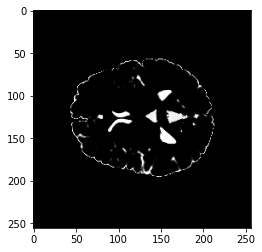

In [ ]:
plt.imshow(fuzzy['probability_images'][0].numpy(),cmap='gray')

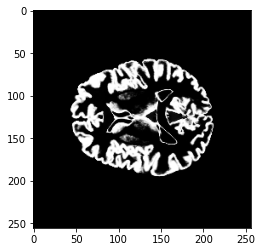

In [ ]:
plt.imshow(fuzzy['probability_images'][1].numpy(),cmap='gray')

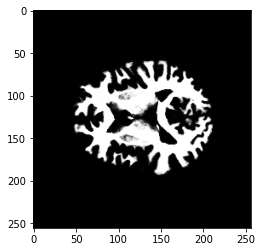

In [ ]:
plt.imshow(fuzzy['probability_images'][2].numpy(),cmap='gray')

In [ ]:
def seg_slice(image):
  seg0 = []
  seg1 = []
  seg2 = []
  for i in range(len(image)):
    print('Image " ',i)
    img = ants.from_numpy(image[i].numpy())
    mask = ants.get_mask(img)
    fuzzy = ants.fuzzy_spatial_cmeans_segmentation(img, mask, number_of_clusters=3)['probability_images']
    seg0.append(fuzzy[0].numpy())
    seg1.append(fuzzy[1].numpy())
    seg2.append(fuzzy[2].numpy())
  return (th.tensor(seg0),th.tensor(seg1),th.tensor(seg2))

In [ ]:
#t1_train_seg0,t1_train_seg1,t1_train_seg2 = seg_slice(t1_train_pre)

In [ ]:
len(t2_train_pre)

28

In [ ]:
t2_train_seg0,t2_train_seg1,t2_train_seg2 = seg_slice(t2_train_pre)

Image "  0
Image "  1
Image "  2
Image "  3


KeyboardInterrupt: ignored

In [ ]:
len(t2_train_seg1)

In [ ]:
 fig,ax = plt.subplots(5,4,figsize=(20,20))
for i in range(len(t2_train)):
  im00 = t2_train_pre[i]
  im0 = t2_train_seg0
  im1 = t2_train_seg1
  im2 = t2_train_seg2
  ax[i][0].imshow(im00.permute(1,2,0),cmap='gray')
  ax[i][1].imshow(im0.permute(1,2,0),cmap='gray')
  ax[i][2].imshow(im1.permute(1,2,0),cmap='gray')
  ax[i][3].imshow(im2.permute(1,2,0),cmap='gray')
  if i>=4:
    break

# Model Building

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
t1_train[0][0].shape

torch.Size([3, 217, 181])

In [ ]:
def conv_size(ih,iw,pt,pb,k,s): #ih=input height,iw=input width,pt=padding top,pd=padding down,k=ernal size,s=strid
  print('Height : ',((ih+pt+pb-k)/(s))+1)
  print('Width : ',((iw+pt+pb-k)/(s))+1)


In [ ]:
def maxpool(ih,iw,k,s):#ih=input height,iw=input width, k=kerna size,s=strid
  print("Height : ",((ih-k)/s)+1)
  print("Width : ",((iw-k)/s)+1)

In [ ]:
conv_size(217,181,0,0,3,2)

Height :  108.0
Width :  90.0


In [ ]:
maxpool(108,90,2,2)

Height :  54.0
Width :  45.0


In [ ]:
#print('1 : ',conv_size(53,44,0,0,3,1))
print('2 : ',conv_size(54,45,0,0,3,1))

Height :  52.0
Width :  43.0
2 :  None


In [ ]:
print('1 :',maxpool(52,43,2,1))
#print('2 :',maxpool(52,43,2,1))

Height :  51.0
Width :  42.0
1 : None


In [ ]:
print('1 :',conv_size(51,42,0,0,3,1))
#print('1 :',conv_size(48,39,0,0,3,1))

Height :  49.0
Width :  40.0
1 : None


In [ ]:
###########
conv_size(32,32,0,0,5,1)

Height :  28.0
Width :  28.0


In [ ]:
maxpool(28,28,2,2)

Height : 13.0
Width : 13.0
Height :  14.0
Width :  14.0


In [ ]:
conv_size(13,13,0,0,5,1)

Height :  9.0
Width :  9.0


In [ ]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Mod2(nn.Module):
  def __init__(self):
    super(Mod2,self).__init__()
    self.rows = 49
    self.cols = 40
    self.lay1 = nn.Conv2d(3,32,3,2,0,)
    self.lay2 = nn.MaxPool2d(2,2,return_indices=True)
    self.lay3 = nn.Conv2d(32,64,3,1,0)
    self.lay4 = nn.MaxPool2d(2,1,return_indices=True)
    self.lay5 = nn.Conv2d(64,128,3,1,0)

    self.mean = nn.Linear(128*self.rows*self.cols,128)
    self.log_var = nn.Linear(128*self.rows*self.cols,128)
    
    self.decFCL = nn.Linear(128,128*self.rows*self.cols)
    self.declay2 = nn.ConvTranspose2d(128,64,3,1,0)
    self.declay2_1 = nn.MaxUnpool2d(2,1)
    self.declay1 = nn.ConvTranspose2d(64,32,3,1,0)
    self.declay1_1 = nn.MaxUnpool2d(2,2)
    self.declay0 = nn.ConvTranspose2d(32,3,3,2,0)


  def encoder(self,x):
    #print('Entered ENCODER : ',x.shape)
    x = F.leaky_relu(self.lay1(x)) # 1st Conv
    #print('1ST Conv POOL LAYER :',x.shape)
    x,ind1 = self.lay2(x) # 1st Max Pool  ==> I have Indexed Max Pool Layer
    #print('1ST MAX POOL LAYER :',x.shape)
    x = F.leaky_relu(self.lay3(x)) # 2nd Conv
    #print('After 2nd Conv Layer :',x.shape)
    x,ind2 = self.lay4(x)

    x = F.leaky_relu(self.lay5(x))
    #print('Output of Last Conv Layer : ',x.shape)
    x = x.view(-1,128*self.rows*self.cols)
    mu = self.mean(x)
    logvar = self.log_var(x)
    return mu,logvar,(ind1,ind2)

  def reparameterize(self, mu, logVar):
    std = th.exp(logVar/2)
    eps = th.randn_like(std)
    return mu + std * eps


  def decoder(self,x,ind):
    x = F.leaky_relu(self.decFCL(x))
    x = x.view(-1,128,self.rows,self.cols)
    x = F.leaky_relu(self.declay2(x))
    x = self.declay2_1(x,ind[-1])
    x = F.leaky_relu(self.declay1(x))
    x = self.declay1_1(x,ind[0])
    #x = F.pad(x,(0,0,2,0))
    x = F.leaky_relu(self.declay0(x))
    x = F.sigmoid(x)
    return x



  def forward(self,x):
    mu,logvar,ind = self.encoder(x)
    z = self.reparameterize(mu,logvar)
    out = self.decoder(z,ind)
    return out,mu,logvar



In [ ]:
learning_rate = 0.001
num_epochs = 20

In [ ]:

"""
Initialize the network and the Adam optimizer
"""
device='cpu'
net = Mod2().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
Loss1 = []
Val_loss = []

In [ ]:
net

Mod2(
  (lay1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (lay2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lay3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (lay4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (lay5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (mean): Linear(in_features=250880, out_features=128, bias=True)
  (log_var): Linear(in_features=250880, out_features=128, bias=True)
  (decFCL): Linear(in_features=128, out_features=250880, bias=True)
  (declay2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (declay2_1): MaxUnpool2d(kernel_size=(2, 2), stride=(1, 1), padding=(0, 0))
  (declay1): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (declay1_1): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (declay0): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(2, 2))
)

In [ ]:



"""
Training the network for a given number of epochs
The loss after every epoch is printed
"""
#print(net)
for epoch in (range(num_epochs)):
    ii = 0
    losss = []
    val_loss = []

    for i in t1_train_pre_dl:
        tar = t2_train_bfc[ii].to(device)
        imgs = i
        #print(imgs.shape)
        #imgs = imgs[0]
        imgs = imgs.to(device)

        # Feeding a batch of images into the network to obtain the output image, mu, and logVar
        out, mu, logVar = net(imgs)

        # The loss is the BCE loss combined with the KL divergence to ensure the distribution is learnt
        kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.mse_loss(out[0], tar) + kl_divergence

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('l> : ',float(loss))
        ii = ii + 1
        losss.append(loss)
    ijk = 0
    for immgg,lab in t1_test_dl:
      img2 = immgg.to(device)
      tar2 = t2_test[ijk][0].to(device)
      out, mu, logVar = net(img2)
      kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
      loss2 = F.mse_loss(out[0], tar2) + kl_divergence
      val_loss.append(loss2)
      ijk = ijk + 1

    Loss1.append(float(sum(losss)/len(losss)))
    Val_loss.append(float(sum(val_loss)/len(val_loss)))
    print('\tEpoch [{}]: Loss: {:.4f}, Val_Loss: {:.4f}'.format(epoch, loss,loss2))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



NameError: ignored

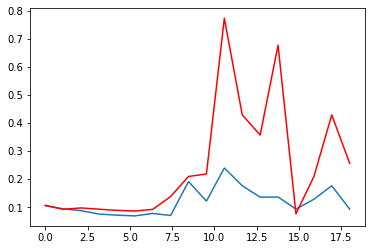

In [ ]:
n=2
l = Loss1[n:]
l2 = Val_loss[n:]
plt.plot(np.linspace(0,len(l),len(l)),l)
plt.plot(np.linspace(0,len(l2),len(l2)),l2,color='red')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



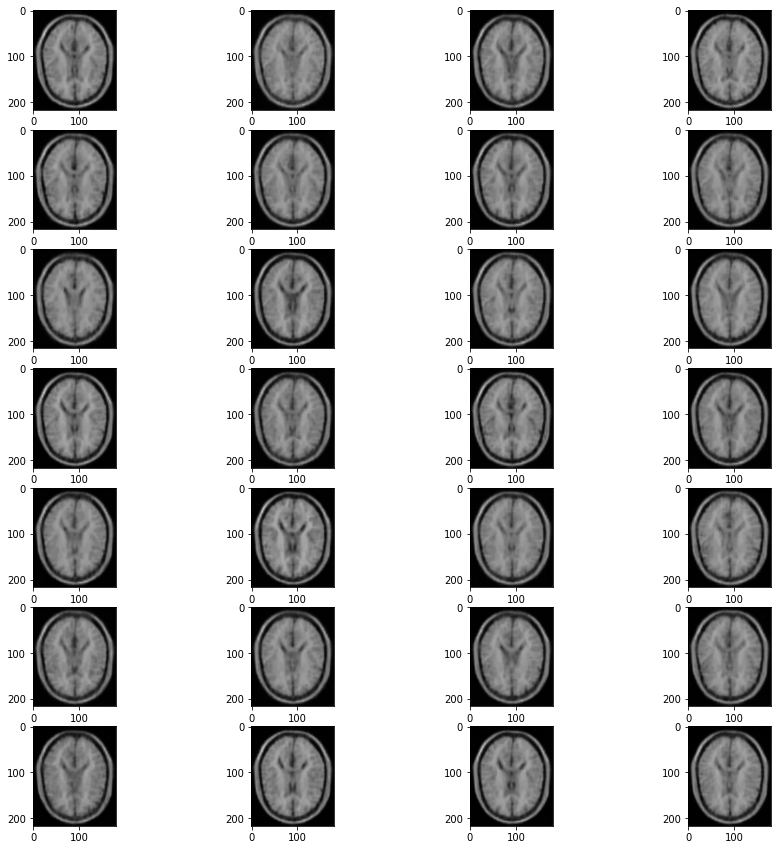

In [ ]:

ax,fig = plt.subplots(7,4,figsize=(15,15))
r=c=1
for img,lab in t1_train_dl:
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][c-1].imshow(im,cmap='gray')
  #plt.show()
  if c%4==0:
    r = r+1
  c = (c+1)%4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



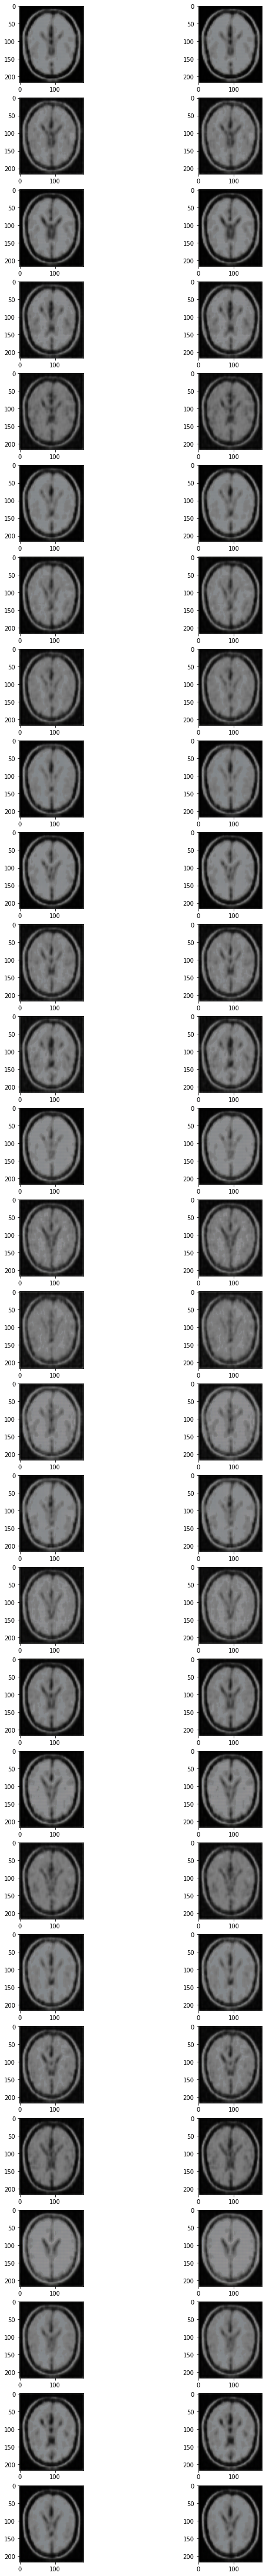

In [ ]:
ax,fig = plt.subplots(7*4,2,figsize=(10,80))
r=c=1
ii = 0
for img,lab in t1_train_dl:
  org = t2_train_pre[ii].detach().numpy()
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(im,cmap='gray')
  fig[r-1][1].imshow(im,cmap='gray')
  #plt.show()
  #if c%4==0:
  r = r+1
  ii=ii+1
  #c = (c+1)%4

# Testing

In [ ]:
t1_test= Subset(test,list(range(0,4)))
t2_test= Subset(test,list(range(4,8)))

In [ ]:
t1_test_dl = DataLoader(t1_test,1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



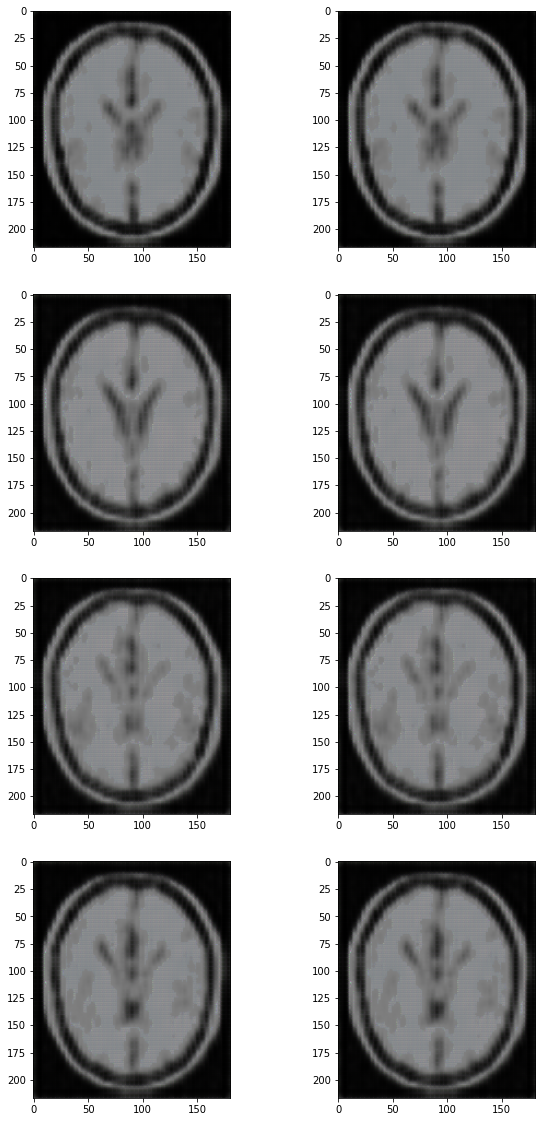

In [ ]:
ax,fig = plt.subplots(len(t1_test),2,figsize=(10,20))
r=c=1
ii = 0
for img,lab in t1_test_dl:
  org = t2_test[ii][0].detach().numpy()
  img2 = img.to(device)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(im,cmap='gray')
  fig[r-1][1].imshow(im,cmap='gray')
  #plt.show()
  #if c%4==0:
  r = r+1
  ii=ii+1
  #c = (c+1)%4





In [ ]:
def pred(testdl):
  org = []
  prd = []
  ii=0
  for img,lab in testdl:
    img2 = img.to(device)
    im = net.forward(img2)
    org.append(t2_test[ii][0].detach().numpy())
    print(im[0].shape)
    prd.append(im[0][0].cpu().detach().numpy())
  print(org[0],org[0].shape)
  print('\n2\n',prd[0],prd[0].shape)
  #print('ACC : ',accuracy(prd,org))
  return th.from_numpy(np.array(org)),th.from_numpy(np.array(prd))

In [ ]:
o,p=pred(t1_test_dl)

In [ ]:
o.shape,p.shape

(torch.Size([4, 3, 217, 181]), torch.Size([4, 3, 217, 181]))

In [ ]:
def accuracy(pred,target):
    _,pred = th.max(pred,dim=1)
    return th.tensor(th.sum(pred==target).item()/len(target))

In [ ]:
t2_train_pre[0].shape

torch.Size([3, 217, 181])

In [ ]:
th.save(net,'Mode1_Seg2_0.1_epo30050')

In [ ]:
testdata = ImageFolder('/content/Test/',transform=transform.ToTensor())

In [ ]:
test_dl = DataLoader(testdata,1)

In [ ]:

ax,fig = plt.subplots(4,2,figsize=(15,15))
r=c=1
for img,lab in t1_train_dl:
  img2 = img.to(device)
  print(img2.shape)
  im = net.forward(img2)
  im = im[0][0].permute(1,2,0)
  imz = img2[0].permute(1,2,0)
  imz = imz.cpu().detach().numpy()
  im = im.cpu().detach().numpy()
  fig[r-1][0].imshow(im,cmap='gray')
  fig[r-1][1].imshow(imz,cmap='gray')

  #plt.show()
  #if c%4==0:
  r = r+1
  #c = (c+1)%4